In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets


data = pd.read_csv('lecture4data.csv')
#X = pd.Dataframe(data,columns = ['Country Name','Economic Stability','Gap between Rich and Poor','Instability of neighbours','Military Power','Technological developments of arms and warfare','Immigration','Stability of Government','Diversity','Public Unrest','Geographical Factors'])
data.head(5)

,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings
0,Alabama A & M University,Normal,AL,0.6538,4505,20809,0.1104,49720.22,29900
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200
2,University of Alabama in Huntsville,Huntsville,AL,0.8120,5829,20999,0.1848,58688.62,45600
3,Alabama State University,Montgomery,AL,0.4639,4740,18100,0.1216,46065.20,26700
4,The University of Alabama,Tuscaloosa,AL,0.5359,31005,27205,0.4135,57928.41,42700


In [13]:
#features = data[['Country Name','Economic Stability','Gap between Rich and Poor','Instability of neighbours','Military Power','Technological developments of arms and warfare','Immigration','Stability of Government','Diversity','Public Unrest','Geographical Factors']]
#target = data['War Index']
features = data[['adm_rate','undergrads','cost','compl_4','median_hh_inc']]
target = data['median_earnings']

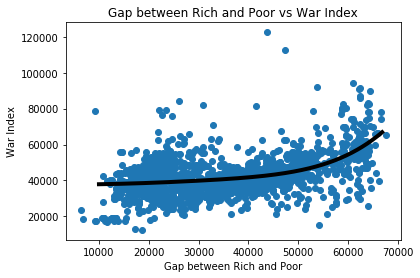

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
test = pd.DataFrame({'cost': pd.Series(range(10000, 67000, 100))})
poly_model = make_pipeline(PolynomialFeatures(5), LinearRegression())
poly_model = poly_model.fit(data[['cost']], data[['median_earnings']])
predictions = poly_model.predict(test)
plt.scatter(data['cost'], data['median_earnings'])
plt.plot(test, predictions, 'k', linewidth=4)
plt.title('Gap between Rich and Poor vs War Index')
plt.xlabel('Gap between Rich and Poor')
plt.ylabel('War Index')
plt.show()

In [24]:
from sympy import S, symbols
arr1 = test.flatten()
p = np.polyfit(arr1,predictions,5)
x = symbols("x")
poly = sum(S("{:6.2f}".format(v))*x**i for i, v in enumerate(p[::-1]))
eq_latex = sympy.printing.latex(poly)

plt.plot(test, predictions, 'k', label="${}$".format(eq_latex),linewidth=4)
plt.legend(fontsize="small")
plt.title('Gap between Rich and Poor vs War Index')
plt.xlabel('Gap between Rich and Poor')
plt.ylabel('War Index')
plt.show()



TypeError: unsupported format string passed to numpy.ndarray.__format__

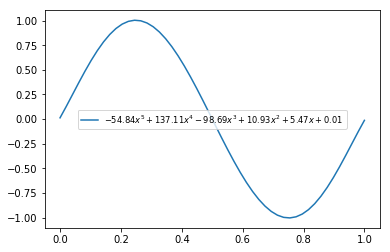

In [26]:
from sympy import S, symbols
import sympy as smp

from matplotlib import pyplot as plt
import numpy as np

x=np.linspace(0,1,100)
y=np.sin(2 * np.pi * x)

p = np.polyfit(x, y, 5)
f = np.poly1d(p)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

x = symbols("x")
poly = sum(S("{:6.2f}".format(v))*x**i for i, v in enumerate(p[::-1]))
eq_latex = smp.printing.latex(poly)

plt.plot(x_new, y_new, label="${}$".format(eq_latex))
plt.legend(fontsize="small")

In [ ]:
import matplotlib as plt
Z, hmx, hmy = np.histogram2d(X['Country Name'],X['War Index'])

plt.title('Heatmap')
plt.xlabel('Country Name')
plt.ylabel('War Index')
plt.pcolormesh(hmx,hmy,Z.T)

plt.show()